<a href="https://colab.research.google.com/github/issarbhavya/ML/blob/main/02_2_neural_network_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiclass classification

***Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.***

In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist ### importing dataset


# the data is already in tensor form and splitted into train and test data
# So we just need to load the dataset
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
 

4422102/4422102 [==============================] - 1s 0us/step




---


Label	Description

0 :	T-shirt/top

1	: Trouser

2	: Pullover

3	: Dress

4	: Coat

5	: Sandal

6	: Shirt

7	: Sneaker

8	: Bag

9	: Ankle boot

---



In [2]:
print(f"Training sample:\n{train_data[0]}\n\n")   # one of the element 
print(f"Training label: {train_labels[0]}")  # and its label

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  



---


as the label is 9 then we can know that the image is of an ankle booot

In [3]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

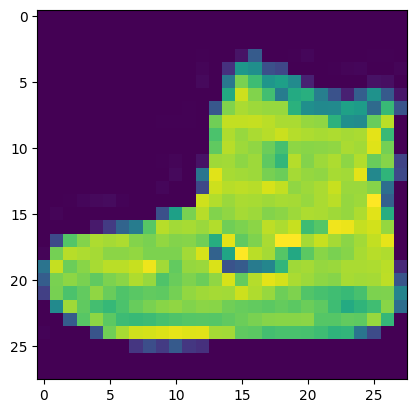

In [4]:
# Plotting our sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]); ## this shows the image on matplotlib

## the below isn't the exact same image given to us in data, instead
## it is the image obtained on plotting the tensor data on matplotlib

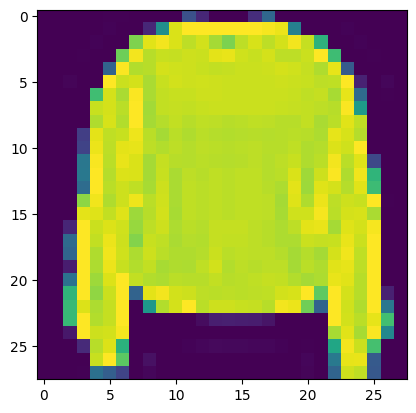

In [5]:
## lets plot one more
plt.imshow(train_data[7])

In [6]:
# label of it is 
train_labels[7]

2

In [7]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

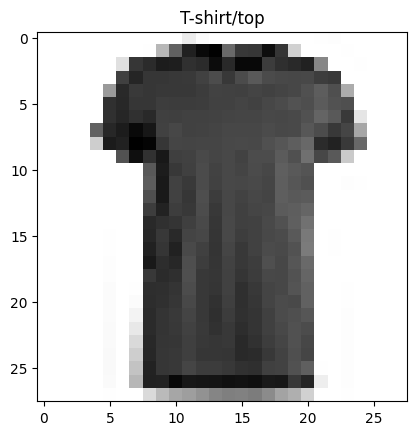

In [8]:
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]); # setting label as title name of image

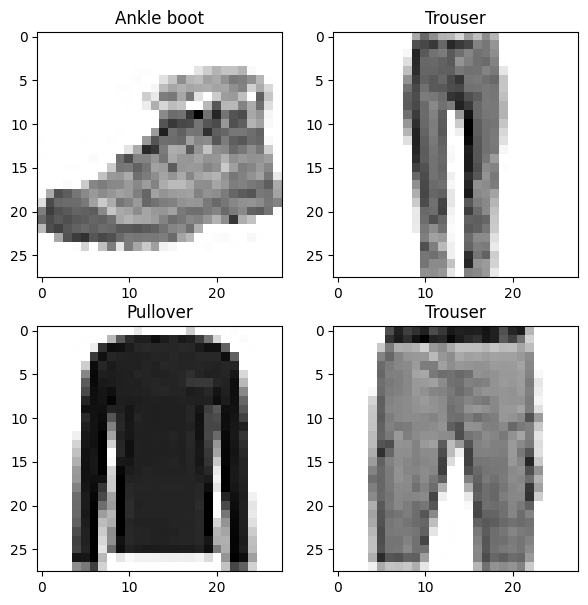

In [9]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7)) #increases the size
for i in range(4):
  ax= plt.subplot(2,2,i+1) # 2 rows, 2 columns , nd index will increase by 1 everytime
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  # plt.axis(False)


In [10]:
tf.random.set_seed(42)

#create
model_11= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # Flattening is used to convert resultant 2-Dimensional arrays into a single long continuous linear vector
    # so, here it will be 28 * 28 = 784

    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    
    tf.keras.layers.Dense(10, activation="softmax") # in multiclass, output layer activation is SOFTMAX
])

#compile
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 # different loss function for multiclass classifcation,
                 # for providing labels as integers, we can use SparseCategoricalCrossentropy
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"]
                 )

non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data,test_labels)
                                ## see how the model performs on the test set during training
                                )

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4132 - accuracy: 0.1019 - val_loss: 2.3020 - val_accuracy: 0.1002
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2848 - accuracy: 0.1074 - val_loss: 2.2710 - val_accuracy: 0.1195
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2536 - accuracy: 0.1243 - val_loss: 2.2622 - val_accuracy: 0.1183
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.2184 - accuracy: 0.1363 - val_loss: 2.2266 - val_accuracy: 0.1475
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1104 - accuracy: 0.1687 - val_loss: 1.9065 - val_accuracy: 0.1952
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8294 - accuracy: 0.1997 - val_loss: 1.7671 - val_accuracy: 0.2001
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7688 - accuracy: 0.2100 - val_loss: 1.7216 - val_accuracy:

val_loss and val_accuracy is the the loss and accuracy that our model has on the test data

our val_accuracy is around 40 percent only and ,

* guessing with 10 classes would result in about 10% accuracy, but we can do better thus, our model is currently just a bit better then gussing

In [11]:
train_data.min(), train_data.max()

(0, 255)

neural networks prefer data to be normalized, that is they work on finding patterns between 0s and 1s ,

thus 255 is a bigger set nd finding pattern in these would be too difficult



---
Thus to normalize, 

We can get these values between 0 and 1 by dividing the entire array by the maximum: 255.0 (dividing by a float also converts to a float).


In [12]:
# before, train_data f a single image looks like
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [13]:
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()


(0.0, 1.0)

In [14]:
train_data[0] # the folowing is the data of just a single image


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
train_data.size, train_labels.size, test_data.size 
# train_data size will be 28*28*6, coz the picture is 28 X 28 pixels
# nd number of images is 60000, thus size of data is 47040000

(47040000, 60000, 7840000)

In [16]:
## making model_12 similar to model_11 just the training datasets are the new ones


tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=20,
                            validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1918 - accuracy: 0.5275 - val_loss: 0.7710 - val_accuracy: 0.7144
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6877 - accuracy: 0.7477 - val_loss: 0.6588 - val_accuracy: 0.7558
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6221 - accuracy: 0.7689 - val_loss: 0.6222 - val_accuracy: 0.7668
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5961 - accuracy: 0.7793 - val_loss: 0.6049 - val_accuracy: 0.7734
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5815 - accuracy: 0.7821 - val_loss: 0.5945 - val_accuracy: 0.7789
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5702 - accuracy: 0.7857 - val_loss: 0.5906 - val_accuracy: 0.7803
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5635 - accuracy: 0.7876 - val_loss: 0.6046 - val_accuracy:

(-0.9500000000000001, 19.95, 0.47291340827941897, 1.2259989738464356)

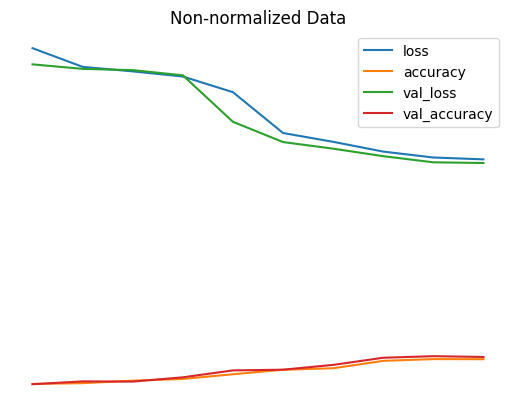

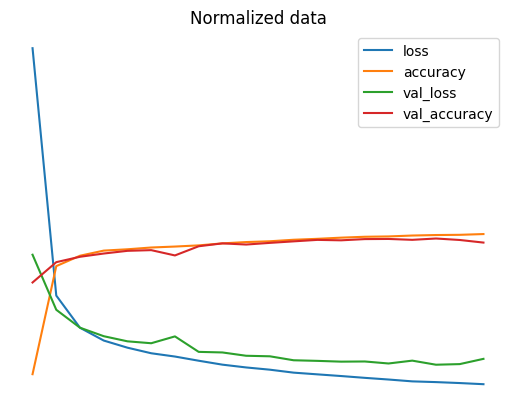

In [17]:
import pandas as pd


pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data") # for model_11
plt.axis(False)

pd.DataFrame(norm_history.history).plot(title="Normalized data") # for model_12
plt.axis(False)

🔑 Note: The same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

In [18]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20)) ## learn this line

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),

                               callbacks=[lr_scheduler]) # this as well

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2887 - accuracy: 0.4852 - val_loss: 1.0421 - val_accuracy: 0.5714 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9271 - accuracy: 0.6415 - val_loss: 0.8389 - val_accuracy: 0.6886 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7514 - accuracy: 0.7135 - val_loss: 0.7373 - val_accuracy: 0.7170 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6777 - accuracy: 0.7341 - val_loss: 0.6844 - val_accuracy: 0.7308 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6398 - accuracy: 0.7554 - val_loss: 0.6463 - val_accuracy: 0.7630 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6107 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7648 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

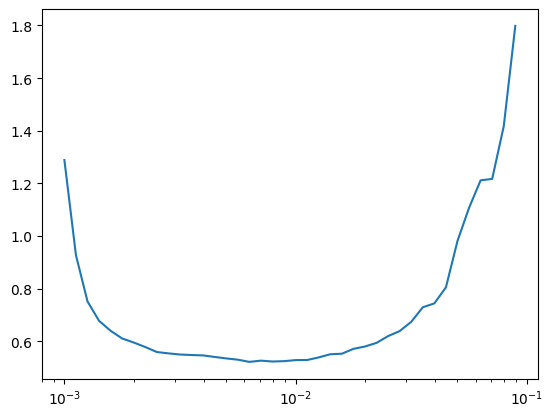

In [19]:
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])

## here x axis is learning_rate and y axis is loss

finding ideal learning rate, we need to find the lowest point and then check where was the graph sharply decreasing

here it seems it was 10^-3 i.e. 0.001 which itself is the default lr of adam,

so till now model_12 was the best

In [20]:
#model 14 will be similar to model_12 just the epochs will be 20

# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=25,
                       validation_data=(test_data, test_labels))

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9638 - accuracy: 0.6201 - val_loss: 0.6887 - val_accuracy: 0.7667
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6297 - accuracy: 0.7863 - val_loss: 0.6180 - val_accuracy: 0.7924
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5825 - accuracy: 0.7997 - val_loss: 0.6044 - val_accuracy: 0.7891
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5601 - accuracy: 0.8073 - val_loss: 0.5900 - val_accuracy: 0.7958
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5478 - accuracy: 0.8102 - val_loss: 0.5886 - val_accuracy: 0.7961
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5380 - accuracy: 0.8122 - val_loss: 0.6052 - val_accuracy: 0.7860
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5322 - accuracy: 0.8148 - val_loss: 0.5959 - val_accuracy:

In [21]:
y_probs= model_14.predict(test_data)

# first 5 predictions are :
y_probs[:5]  

## explenation of the output ,
# the 5 arrays are data of 5 different image prediction result,

#let's just take 1, there are 10 values in one, and the values showcase that what could the image of the following probably be

# the highest value's index will depict the label, for e.g. in the first, highest alue is at index 7,
# thus we will check for the item which has label as 7

313/313 [==============================] - 1s 1ms/step


array([[1.6455836e-09, 8.3967094e-14, 4.5580494e-11, 1.4321192e-07,
        3.5515111e-08, 1.2929191e-01, 1.2390408e-08, 1.3981974e-01,
        1.8492386e-04, 7.3070312e-01],
       [2.6210360e-05, 8.5214797e-06, 9.8798460e-01, 3.0381446e-07,
        2.7795215e-03, 8.0962067e-25, 9.2008375e-03, 0.0000000e+00,
        3.4179970e-10, 0.0000000e+00],
       [2.2324008e-08, 9.9988002e-01, 1.0032411e-04, 1.3242529e-06,
        1.8023749e-05, 1.6172084e-08, 7.7842685e-08, 7.6961918e-08,
        3.6837985e-10, 2.2361972e-16],
       [4.2164827e-10, 9.9996716e-01, 1.3701097e-05, 1.1701546e-05,
        6.9756607e-06, 1.2718240e-10, 3.1830065e-09, 4.3906562e-07,
        3.1126974e-12, 3.9908364e-14],
       [2.8026941e-01, 5.8275615e-03, 2.4049366e-01, 6.4969771e-02,
        2.3781437e-02, 3.0069458e-07, 3.8370004e-01, 7.0367622e-15,
        9.5783407e-04, 8.6049872e-17]], dtype=float32)

In [22]:
y_probs[0]

array([1.6455836e-09, 8.3967094e-14, 4.5580494e-11, 1.4321192e-07,
       3.5515111e-08, 1.2929191e-01, 1.2390408e-08, 1.3981974e-01,
       1.8492386e-04, 7.3070312e-01], dtype=float32)

In [23]:
y_probs[0].argmax()

9

In [24]:
# now let's check for label 5
class_names[9]

'Ankle boot'

In [25]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10], test_labels[:10]

(array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]),
 array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8))

In [26]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[822,   1,  18,  79,   0,   1,  68,   2,   9,   0],
       [  1, 925,  16,  55,   2,   0,   1,   0,   0,   0],
       [ 25,   4, 786,  22,  77,   0,  82,   0,   4,   0],
       [ 50,   5,  24, 879,  13,   1,  22,   2,   4,   0],
       [  1,   1, 217,  60, 604,   0, 114,   0,   3,   0],
       [  2,   0,   0,   1,   0, 903,   0,  57,   2,  35],
       [259,   4, 167,  64,  68,   1, 429,   0,   8,   0],
       [  0,   0,   0,   0,   0,  30,   0, 923,   0,  47],
       [ 13,   1,   4,  16,   3,  19,  54,   4, 886,   0],
       [  1,   0,   0,   1,   0,  18,   0,  35,   0, 945]])

In [36]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image2(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
      
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 20ms/step


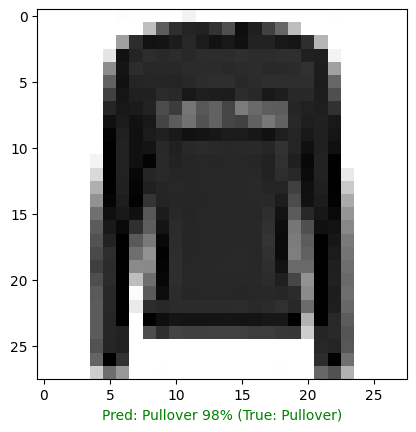

In [37]:
# Check out a random image as well as its prediction
plot_random_image2(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)